# 토치를 사용한 딥 러닝: 60분에 끝내기


### 이 강좌의 목적
* 토치와 신경망 패키지를 고수준에서 이해하기
* CPU와 GPU에서 작은 신경망을 학습시켜 보기

## 토치란?

토치는 루아[JIT]과 강력한 CPU 및 쿠다(CUDA) 뒷단에 기반한 과학 계산 프레임워크입니다.

토치의 강점:

* 효율적인 텐서 라이브러리 (NumPy와 같은) 및 효율적인 쿠다(CUDA) 뒷단
* 신경망 패키지 -- 자동 미분이 지원되는 임의의 비순환 계산 그래프 만들기
   * 빠른 CUDA와 CPU 뒷단 지원   
* 양질의 커뮤니티와 기업 지원 - 커뮤니티에서 만들고 관리하는 수백개의 패키지
* 다중 GPU와 신경망 병렬화 작업 용이

http://torch.ch  
https://github.com/torch/torch7/wiki/Cheatsheet

## 시작하기에 앞서

* 루아 기반이고, 속도가 빠른 루아-JIT(Just-in-time 컴파일러)에서 동작합니다.
* 루아는 자바스크립트와 매우 비슷합니다.
   * 변수들은 `local` 키워드를 쓰기 전에는 기본적으로 전역 변수입니다.
* 테이블(`{}`)이라는 단 하나의 자료형만 가지고 있습니다. 해쉬 테이블과 배열로 사용 가능합니다.
* 숫자를 1부터 셉니다.
* `foo:bar()`는 `foo.bar(foo)`와 같습니다.

## 시작합시다
#### 문자열, 숫자, 테이블 - 간단한 설명

In [1]:
a = '안녕하세요'

In [2]:
print(a)

안녕하세요	


In [3]:
b = {}

In [4]:
b[1] = a

In [5]:
print(b)

{
  1 : 안녕하세요
}


In [6]:
b[2] = 30

In [7]:
for i=1,#b do -- 루아의 # 연산자는 길이를 뜻합니다.
    print(b[i]) 
end

안녕하세요	
30	


#### 텐서

In [8]:
a = torch.Tensor(5,3) -- 초기화되지 않은 5x3 행렬을 만듭니다.

In [9]:
a = torch.rand(5,3)
print(a)

 0.9557  0.1468  0.4939
 0.1668  0.9644  0.7250
 0.5418  0.2848  0.2330
 0.4625  0.7692  0.4746
 0.0354  0.7377  0.6180
[torch.DoubleTensor of size 5x3]



In [10]:
b=torch.rand(3,4)

In [11]:
-- 행렬곱: 제 1 방식
a*b 

 0.5693  0.6139  1.4226  0.5961
 1.3499  1.1109  1.1699  0.2167
 0.4964  0.4059  0.8317  0.3436
 1.0822  0.8386  1.1493  0.3481
 1.0488  0.8925  0.8666  0.1202
[torch.DoubleTensor of size 5x4]



In [12]:
-- 행렬곱: 제 2 방식
torch.mm(a,b) 

 0.5693  0.6139  1.4226  0.5961
 1.3499  1.1109  1.1699  0.2167
 0.4964  0.4059  0.8317  0.3436
 1.0822  0.8386  1.1493  0.3481
 1.0488  0.8925  0.8666  0.1202
[torch.DoubleTensor of size 5x4]



In [13]:
-- 행렬곱: 제 3 방식
c=torch.Tensor(5,4)
c:mm(a,b) -- a*b의 결과를 c에 저장합니다.
print(c)

 0.5693  0.6139  1.4226  0.5961
 1.3499  1.1109  1.1699  0.2167
 0.4964  0.4059  0.8317  0.3436
 1.0822  0.8386  1.1493  0.3481
 1.0488  0.8925  0.8666  0.1202
[torch.DoubleTensor of size 5x4]



#### 쿠다(CUDA) 텐서
`:cuda` 함수를 사용해서 텐서를 GPU로 옮길 수 있습니다.

In [14]:
require 'cutorch';
a = a:cuda()
b = b:cuda()
c = c:cuda()
c:mm(a,b) -- 이제 계산이 GPU에서 이루어집니다.
print(c)

 0.5693  0.6139  1.4226  0.5961
 1.3499  1.1109  1.1699  0.2167
 0.4964  0.4059  0.8317  0.3436
 1.0822  0.8386  1.1493  0.3481
 1.0488  0.8925  0.8666  0.1202
[torch.CudaTensor of size 5x4]



#### 연습: 두 텐서 더하기
https://github.com/torch/torch7/blob/master/doc/maths.md#res-torchaddres-tensor1-tensor2

In [15]:
function addTensors(a,b)
    return a -- 이 부분을 고쳐주세요.
end

In [16]:
a = torch.ones(5,2)
b = torch.Tensor(2,5):fill(4)
print(addTensors(a,b))

 1  1
 1  1
 1  1
 1  1
 1  1
[torch.DoubleTensor of size 5x2]



### 신경망
토치에서는 `nn` 패키지를 사용해서 신경망을 만들 수 있습니다.

In [17]:
require 'nn';

모듈(`Modules`)은 신경망에 있어 건물을 지을 때의 벽돌과 같은 존재입니다. 각 모듈은 그 자체로 신경망이기도 하지만, `containers` 명령어를 통해 다른 신경망과 연결되어서 더 복잡한 신경망을 만들 수도 있습니다.

한 예로, 숫자를 분류해내는 다음 신경망을 보도록 하겠습니다.

(파일 원본 출처: http://fastml.com/images/cifar/lenet5.png)
![LeNet](data/deep_learning_with_torch/lenet5.png)

단순한 피드 포워드 신경망입니다.
입력값을 여러 계산에 단계별로 통과시켜서 최종 결과를 출력합니다.

이렇게 입력값을 여러 계산 단계에 적용하는 신경망 컨테이너를 `nn.Sequential` 이라고 합니다.

In [18]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(1,6,5,5))  -- 입력 그림 채널 1, 출력 채널 6, 합성곱 커널 5x5
net:add(nn.ReLU())                       -- 비선형
net:add(nn.SpatialMaxPooling(2,2,2,2))   -- 2x2의 범위에서 최대값을 찾는 맥스 풀링 계산
net:add(nn.SpatialConvolution(6,16,5,5))
net:add(nn.ReLU())                       -- 비선형
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                 -- 16x5x5의 3차원 텐서를 16x5x5의 1차원 텐서로 변환
net:add(nn.Linear(16*5*5, 120))          -- 모두 연결된(fully-connected) 레이어: 입력과 가중치간의 행렬곱입니다.
net:add(nn.ReLU())                       -- 비선형
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- 비선형
net:add(nn.Linear(84, 10))               -- 10은 신경망의 출력 개수입니다. (이 경우 10개의 숫자)
net:add(nn.LogSoftMax())                 -- 출력을 로그 확률로 변환합니다. 분류 문제를 풀 때 유용합니다.

print('Lenet5\n' .. net:__tostring());

Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


nn 컨테이너의 다른 예제는 다음 그림에서 볼 수 있습니다.

(파일 원본 출처: https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/nn_containers.png)
![containers](data/deep_learning_with_torch/nn_containers.png)

토치의 신경망 모듈은 각각 자동 미분 기능을 가지고 있습니다.
각 모듈은 주어진 입력에 대한 출력을 계산하는 `:forward(input)` 함수를 통해서 입력값을 신경망 내부에서 다음 단계로 전달합니다.
또한 각 모듈은 신경망 내의 신경세포(뉴런)를 입력받은 기울기에 따라 미분하는 `:backward(input, gradient)` 함수도 가지고 있습니다.
이 계산은 미분의 연쇄법칙을 통해 이루어집니다.

In [19]:
input = torch.rand(1,32,32) -- 무작위 텐서를 신경망에 입력합니다.

In [20]:
output = net:forward(input)

In [21]:
print(output)

-2.2677
-2.2567
-2.3230
-2.2966
-2.3515
-2.3425
-2.3171
-2.2450
-2.2870
-2.3454
[torch.DoubleTensor of size 10]



In [22]:
net:zeroGradParameters() -- 신경망의 내부 기울기 버퍼를 0으로 만듭니다. (나중에 자세히 설명할 것입니다.)

In [23]:
gradInput = net:backward(input, torch.rand(10))

In [24]:
print(#gradInput)

  1
 32
 32
[torch.LongStorage of size 3]



### 기준: 손실 함수 정의하기
특정 작업을 위한 모델이 필요하다면 그 모델이 일을 얼마나 잘 하고 있는지를 그 모델에게 알려줘야 합니다. 모델의 일처리 능력을 측정하는 함수를 __손실 함수__라고 합니다.

일반적인 손실 함수는 모델의 출력값과 참값을 받아서 모델의 일처리 결과를 수치화합니다.

그 후 모델은 스스로를 고쳐서 손실을 줄입니다.

토치에서 손실 함수는 신경망 모듈과 똑같이 구현되어 있으며 자동 미분을 지원합니다.
손실 함수는 두 함수를 가지고 있습니다 - `forward(input, target)`, `backward(input, target)`

예를 들자면,

In [25]:
criterion = nn.ClassNLLCriterion() -- 다중 분류를 위해 음의 로그 가능도를 기준으로 잡았습니다.
criterion:forward(output, 3) -- 참값이 3이었다고 합시다.
gradients = criterion:backward(output, 3)

In [26]:
gradInput = net:backward(input, gradients)

##### 지금까지 배운 것 복습
* 신경망은 여러 계산 단계를 가질 수 있다.
* 신경망은 입력을 받아서 `:forward`를 통해 출력값을 만든다.
* 기준은 신경망의 손실과 출력값에 대한 기울기를 계산한다.
* 신경망은 되먹임 과정(backward pass)에서 (입력값, 기울기) 쌍을 사용하고 신경망의 각 단계와 그 단계의 신경세포(뉴런)의 기울기도 계산한다.

##### 더 자세한 내용
> 신경망이 학습 가능한 인자들을 가지고 있는지의 여부.

합성곱 레이어는 입력값과 주어진 문제를 풀기에 적합한 합성곱 커널을 학습합니다.
최대값 풀링 레이어는 학습 가능한 인자를 가지고 있지 않습니다. 그저 범위 안의 최대값을 찾을 뿐입니다.

토치에서 학습 가능한 가중치를 가지고 있는 레이어는 일반적으로 가중치(`.weight`) 항목을 가지고 있습니다. (추가로 편향값(`.bias`) 항목을 갖는 경우도 있습니다.)

In [27]:
m = nn.SpatialConvolution(1,3,2,2) -- 3개의 2x2 커널을 학습합니다.
print(m.weight) -- 처음에는 가중치가 무작위로 선택됩니다.

(1,1,.,.) = 
  0.4043 -0.2091
 -0.4127  0.3769

(2,1,.,.) = 
 -0.4682  0.0381
 -0.4462 -0.1156

(3,1,.,.) = 
 -0.4267 -0.1290
  0.1416  0.0612
[torch.DoubleTensor of size 3x1x2x2]



In [28]:
print(m.bias) -- 합성곱 레이어의 계산은 다음과 같습니다. 출력 = 합성곱(입력, 가중치) + 편향값

 0.2715
 0.3211
 0.0467
[torch.DoubleTensor of size 3]



학습 가능한 레이어에는 중요한 항목이 두 개 더 있습니다. gradWeight와 gradBias 입니다.
gradWeight는 레이어의 각 가중치에 대한 기울기를 누적하고, gradBias는 레이어의 각 편향값에 대한 기울기를 누적합니다.

#### 신경망 학습시키기

신경망은 스스로를 조정하기 위해 일반적으로 다음 작업을 합니다. (확률적 경사 하강법을 사용할 경우)
> 가중치 = 가중치 + (학습률 * gradWeight) [식 1]

시간이 흐름에 따라 이 식은 출력값의 손실을 줄이는 쪽으로 신경망의 가중치를 조정할 것입니다.

자, 이제 한 가지 빠진 퍼즐 조각에 대해 이야기할 때가 되었습니다. 누가 여러분의 신경망의 각 레이어를 방문해서 각 가중치를 식 1에 따라 갱신할까요?

여러 답이 있을 수 있지만, 우리는 가장 간단한 답을 사용하도록 하겠습니다.
우리는 신경망 모듈에 포함되어 있는 간단한 SGD 학습기를 사용합니다. (링크: [__nn.StochasticGradient__](https://github.com/torch/nn/blob/master/doc/training.md#stochasticgradientmodule-criterion))

이 학습기의 `:train(dataset)` 함수는 주어진 데이터셋을 받아서 단순히 그때그때 다른 샘플을 신경망에 제공하는 방식으로 여러분의 신경망을 학습시킵니다.

### 데이터는요?

일반적으로 여러분이 그림, 글자, 오디오나 비디오 데이터를 다룰 경우 기본 함수인 [__image.load__](https://github.com/torch/image#res-imageloadfilename-depth-tensortype)나 [__audio.load__](https://github.com/soumith/lua---audio#usage) 등을 사용해서 데이터를 토치 텐서나 루아 테이블에 여러분에게 편한대로 입력할 수 있습니다.

간단한 데이터를 사용해서 우리의 신경망을 학습시켜 봅시다.

우리는 '비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'의 클래스를 가진 CIFAR-10 데이터셋을 사용할 것입니다.
CIFAR-10의 그림 파일들은 3x32x32, 즉 32x32 픽셀 크기의 3채널 컬러 이미지입니다.

(파일 원본 출처: https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png)
![CIFAR-10 그림 파일](data/deep_learning_with_torch/cifar10.png)

이 데이터셋에는 총 50,000개의 학습용 이미지와 10,000개의 테스트용 이미지가 들어 있습니다.

__우리의 첫 토치 신경망을 학습시키기까지는 다섯 단계가 남아 있습니다.__
1. 데이터 불러오고 정규화하기
2. 신경망 정의하기
3. 손실 함수 정의하기
4. 학습 데이터에 대해 신경망 학습시키기
5. 테스트 데이터에 대해 신경망 테스트하기

__1. 데이터 불러오고 정규화하기__

시간을 아끼기 위해 우리는 미리 50000x3x32x32(학습용)와 10000x3x32x32(테스트용)의 4차원 토치 바이트텐서(`ByteTensor`)를 준비해 두었습니다.
데이터를 불러오고 살펴봅시다.

__(역자 주)__

원 문서에는 학습용 데이터가 50000개라고 되어 있는데, 실제로 자료를 다운받아보면 학습용 데이터가 10000개입니다.

In [29]:
require 'paths'
if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
    -- 역자 주: 54MB 짜리 압축 파일을 다운받습니다.
    -- 역자 주: 압축을 풀면 나오는 데이터 파일을 data/deep_learning_with_torch 디렉토리에 저장해 두었습니다.
end
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'비행기', '자동차', '새', '고양이', '사슴',
           '개', '개구리', '말', '배', '트럭'}

Archive:  cifar10torchsmall.zip
  inflating: cifar10-test.t7         


  inflating: cifar10-train.t7        

In [30]:
print(trainset)

{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


In [31]:
print(#trainset.data)

 10000
     3
    32
    32
[torch.LongStorage of size 4]



재미를 위해 이미지 하나를 출력해 보겠습니다.

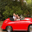

자동차	


In [32]:
itorch.image(trainset.data[100]) -- 데이터셋의 100번째 이미지 출력
print(classes[trainset.label[100]])

이제 __nn.StochasticGradient__에 사용할 데이터셋을 준비하기 위해 [설명서](https://github.com/torch/nn/blob/master/doc/training.md#traindataset)에 따라 몇 가지 해야 할 일이 있습니다.
1. 데이터셋은 `:size()` 함수를 구현하고 있어야 합니다.
2. 데이터셋은 `dataset[i]`가 데이터셋의 `i`번째 샘플을 반환하도록 하는 `[i]` 인덱스 연산자를 구현하고 있어야 합니다.

둘 다 금방 할 수 있습니다.

In [33]:
-- setmetatable은 지금은 무시합시다. 이 학습 자료의 범위를 벗어난 내용으로, 인덱스 연산자를 설정하는 기능을 합니다.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double() -- 바이트텐서의 데이터를 더블텐서로 변환합니다.

function trainset:size() 
    return self.data:size(1) 
end

In [34]:
print(trainset:size()) -- 그냥 테스트 한 번 해보려고요.

10000	


{
  1 : DoubleTensor - size: 3x32x32
  2 : 2
}


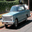

In [35]:
print(trainset[33]) -- 33번 샘플을 불러옵니다.
itorch.image(trainset[33][1])

__여러분이 데이터를 다루는 과정에서 할 수 있는 중요한 일 중 하나는 (데이터 과학이나 기계 학습 영역에서 일반적으로) 데이터 평균을 0.0으로, 표준편차를 1.0으로 맞추는 일입니다.__

우리의 데이터 관리의 최종 단계로 그 작업을 해 봅시다.

이 일을 하기 위해 여러분께 텐서 인덱싱 연산자를 소개해 드리겠습니다.
다음 예제를 봐 주세요.

In [36]:
redChannel = trainset.data[{ {}, {1}, {}, {}  }] -- 결과: {모든 이미지, 채널 1, 모든 수직 방향 픽셀, 모든 수평 방향 픽셀}

In [37]:
print(#redChannel)

 10000
     1
    32
    32
[torch.LongStorage of size 4]



인덱싱 연산자는 ___[{ }]___에서부터 시작됩니다. ___{}___를 사용해서 해당 차원의 모든 원소를 뽑아올 수도 있고, 원소 인덱스가 ___i___일 때 ___{i}___를 사용해서 특정 원소를 선택할 수도 있습니다. ___{i1, i2}___를 사용해서 범위 내의 원소를 출력할 수도 있습니다. 예를 들어 ___{3,5}___는 3, 4, 5번째 원소를 출력합니다.

__연습: 데이터에서 150번째부터 300번째까지의 원소를 선택해보세요.__

In [38]:
-- 해보세요!
-- 역자 주: 저는 이렇게 풀었습니다.
data150to300 = trainset.data[{ {150,300}, {}, {}, {} }]
print(#data150to300)

 151
   3
  32
  32
[torch.LongStorage of size 4]



데이터의 각 원소에서 평균값을 빼고 표준편차를 조정하는 내용으로 돌아갑시다. 위에서 배운 인덱싱 연산자를 사용하면 이 작업이 쉽습니다. 

In [39]:
mean = {} -- 평균값. 나중에 테스트셋을 정규화 할 때 사용합니다.
stdv = {} -- 나중을 위해 표준편차를 저장합니다.
for i=1,3 do -- 각각의 이미지 채널에 대해서
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- 평균값 추정
    print('채널 ' .. i .. ', 평균: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i])    -- 평균값을 빼기
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std()  -- 표준편차 추정
    print('채널 ' .. i .. ', 표준편차: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i])     -- 표준편차 조정
end

채널 1, 평균: 125.83175029297	


채널 1, 표준편차: 63.143400842609	


채널 2, 평균: 123.26066621094	


채널 2, 표준편차: 62.369209019002	


채널 3, 평균: 114.03068681641	


채널 3, 표준편차: 66.965808411114	


눈치채셨다시피 이제 학습 데이터가 정규화되어 사용될 준비가 되었습니다.

__2. 우리의 신경망을 정의할 때입니다.__


**연습:** 위의 __신경망__ 항목에서 신경망을 복사해서 3채널 이미지를 입력받을 수 있도록 수정해보세요. (위의 신경망은 1채널 이미지만 입력받도록 되어 있습니다.)
도움: 맨 처음 레이어에서만 숫자를 1에서 3으로 바꾸면 됩니다.

In [40]:
-- 여기에 연습해보세요!


__해답:__

In [41]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3,6,5,5))  -- 입력 그림 채널 3, 출력 채널 6, 합성곱 커널 5x5
net:add(nn.ReLU())                       -- 비선형
net:add(nn.SpatialMaxPooling(2,2,2,2))   -- 2x2의 범위에서 최대값을 찾는 맥스 풀링 계산
net:add(nn.SpatialConvolution(6,16,5,5))
net:add(nn.ReLU())                       -- 비선형
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                 -- 16x5x5의 3차원 텐서를 16x5x5의 1차원 텐서로 변환
net:add(nn.Linear(16*5*5, 120))          -- 모두 연결된(fully-connected) 레이어: 입력과 가중치간의 행렬곱입니다.
net:add(nn.ReLU())                       -- 비선형
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- 비선형
net:add(nn.Linear(84, 10))               -- 10은 신경망의 출력 개수입니다. (이 경우 10개의 숫자)
net:add(nn.LogSoftMax())                 -- 출력을 로그 확률로 변환합니다. 분류 문제를 풀 때 유용합니다.

__3. 손실 함수를 정의합시다.__

로그 가능도 분류 손실을 사용하도록 하겠습니다. 대부분의 분류 작업에 유용합니다.

In [42]:
criterion = nn.ClassNLLCriterion()

__4. 신경망 학습시키기.__

여기부터 모든 게 재미있어집니다!
먼저 __nn.StochasticGradient__ 객체를 정의합시다. 그 후에 우리의 데이터셋을 이 객체의 ___:train___ 함수에 입력하면 그때부터 재미있는 일이 시작됩니다.

In [43]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- 5세대에 걸쳐서만 학습을 시킵시다.

In [44]:
trainer:train(trainset)

# StochasticGradient: training	


# current error = 2.2280689231792	


# current error = 1.8978251628878	


# current error = 1.6883114820741	


# current error = 1.5752597623032	


# current error = 1.4904176074658	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.4904176074658	



#### (역자 주)
i7-4790k에서 5세대를 학습하는 데에 45분이 걸렸습니다. 한 세대 당 9분 정도 걸리네요. 꽤 긴 시간입니다.


__5. 신경망을 테스트하고 정확도 출력하기.__

학습 데이터셋 전체를 5번 반복 사용해서 신경망을 학습시켰습니다.
그렇지만 진짜로 신경망이 뭔가를 배웠는지를 확인해봐야 합니다.
신경망이 클래스 라벨을 예측하는지를 보고, 예측값을 참값과 비교해봄을 통해서 신경망을 확인해 보겠습니다. 만약 예측이 정확하다면 그 샘플을 올바른 예측 리스트에 추가합니다.

첫번째 단계입니다. 테스트 셋과 친해지기 위해 이미지 하나를 출력해 보겠습니다.

말	


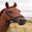

In [45]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

이 작업이 끝났으니 이제 테스트 데이터를 학습 데이터의 평균과 표준편차를 사용해서 정규화합시다.

In [46]:
testset.data = testset.data:double() -- 바이트 텐서를 더블 텐서로 변환합니다.
for i=1,3 do -- 각 채널에 대해서
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- 평균값을 뺍니다.
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i])  -- 표준편차를 조정합니다.
end

In [47]:
-- 재미를 위해 100번째 예제의 평균과 표준편차를 출력해봅시다.
horse = testset.data[100]
print(horse:mean(), horse:std())

0.59066009532189	1.0665356205025	


자, 이제 우리의 신경망이 위 예제를 뭐라고 예측하는지 보도록 합시다.

말	


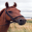

In [48]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])

In [49]:
-- 신경망의 출력값은 로그 확률입니다. 일반 확률로 변환하려면 e^x를 적용해야 합니다.
print(predicted:exp())

 0.0142
 0.0060
 0.0439
 0.2261
 0.0387
 0.2259
 0.0280
 0.3698
 0.0033
 0.0441
[torch.DoubleTensor of size 10]




여러분은 신경망의 예측값을 볼 수 있습니다. 이미지가 주어지면 신경망은 각각의 항목에 대한 확률을 계산해 놓습니다.

명확하게 하기 위해 각각의 확률을 항목으로 이름붙입시다.

In [50]:
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

비행기	0.014225540403785	
자동차	0.0060144075703004	
새	0.043935607255332	
고양이	0.22606220834357	
사슴	0.038727290643215	
개	0.22586520296665	
개구리	0.027960620013114	
말	0.3697799203826	
배	0.0033444720941473	
트럭	0.044084730327285	


좋아요, 좋습니다. 예제 하나의 결과는 좋지 않습니다만, 테스트 셋 전체에 대해서는 맞는 예측값이 몇 개나 있을까요?
(역자 주: 말이라고 제대로 예측되었는데 왜 원문에서는 예제 예측 결과가 좋지 않다고 했는지 잘 모르겠습니다.)

In [51]:
correct = 0
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- 인자의 true는 내림차순 정렬을 의미합니다.
    if groundtruth == indices[1] then
        correct = correct + 1
    end
end

In [52]:
print(correct, 100*correct/10000 .. ' % ')

4704	47.04 % 	


찍는 것보다는 훠어어얼씬 좋아 보입니다. 찍으면 (항목이 10개니까) 확률은 10%일 것입니다. 신경망이 뭔가를 배운 것 같아 보이네요.

음, 신경망이 잘 동작한 항목과 잘 동작하지 않은 항목은 각각 무엇일까요?

In [53]:
class_performance = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0}
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- 인자의 true는 내림차순 정렬을 의미합니다.
    if groundtruth == indices[1] then
        class_performance[groundtruth] = class_performance[groundtruth] + 1
    end
end

#### (역자 주)
이 과정도 시간이 은근 (몇 분 정도) 걸립니다.

In [54]:
for i=1,#classes do
    print(classes[i], 100*class_performance[i]/1000 .. ' %')
end

비행기	46.4 %	
자동차	66 %	
새	37.9 %	
고양이	26.5 %	
사슴	20.8 %	
개	49.9 %	
개구리	51.3 %	
말	55.2 %	
배	63.8 %	
트럭	52.6 %	


좋아요, 이제는 뭘 할까요? 이 신경망을 GPU에서 돌리려면 어떻게 해야 할까요?

#### cunn: 신경망을 쿠다를 사용해서 GPU에서 돌리기

In [55]:
require 'cunn';

간단합니다. 신경망을 가져다가 GPU로 보냅니다.

In [56]:
net = net:cuda()

그리고 기준(손실 함수)도 GPU로 보냅니다.

In [57]:
criterion = criterion:cuda()

네, 이제는 데이터도 보냅니다.

In [58]:
trainset.data = trainset.data:cuda()
trainset.label = trainset.label:cuda()

좋습니다. 이제 GPU에서 학습시켜 보겠습니다. ^^ #엄청_간단함

In [59]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- 다섯 세대만 학습시킵니다.

In [60]:
trainer:train(trainset)

# StochasticGradient: training	


# current error = 1.4157297985792	


# current error = 1.3435925675392	


# current error = 1.2754184183955	


# current error = 1.2101447115064	


# current error = 1.1439341126084	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.1439341126084	



왜 CPU에 비해서 엄!청!난! 속도 향상이 없을까요?
왜냐하면 우리의 신경망이 정말정말 작기 때문입니다.

#### (역자 주)
제가 보기엔 엄청난 속도 향상이 있는 것 같습니다. 학습이 30초 만에 끝났습니다. CPU에서 작업할 때 45분 걸렸던 것에 비해 엄청나게 빠릅니다.

**연습:** 신경망의 크기를 늘려 보시고(`nn.SpatialConvolution(...)`의 첫 번째와 두 번째 인자) GPU를 사용하면 얼마만큼의 속도 향상이 있는지 확인해보세요.

**배운 것**
* 토치와 신경망 패키지를 고수준에서 이해한다.
* 작은 신경망을 CPU와 GPU에서 학습시킨다.

### 이제는 뭘 할까요?

* 엄청 멋진 신경망 그래프 그리기: https://github.com/torch/nngraph
* 여러 GPU를 사용해서 이미지넷 데이터에 대해 학습시키기: https://github.com/soumith/imagenet-multiGPU.torch
* 롱 쇼트 텀 메모리(LSTM)를 사용한 반복(recurrent) 신경망을 텍스트에 대해 학습시키기: https://github.com/wojzaremba/lstm
* 더 많은 예제와 교재: https://github.com/torch/torch7/wiki/Cheatsheet
* 토치 개발자들과 이야기하기: http://gitter.im/torch/torch7
* 도움을 요청하기: http://groups.google.com/forum/#!forum/torch7
